#Title of the Project: Bank customer churn model


Problem Statement:
1. Despite the continuous efforts of banks to attract and retain customers, the
banking industry faces a persistent challenge in the form of customer churn, leading
to financial losses and reduced customer satisfaction.

Project Objective:
1. The aim of this project is to analyze the customer churn rate
for bank because it is useful to understand why the customers leave.
2. After Analyzing we need to train a Machine Learning Model which can find the
key factors that significantly influence the customer churn or attrition.
3. In the end will choose the most reliable model that will attach a probability to the
churn to make it easier for customer service to target right customer in order to
minimize their efforts to prevent customers churn.



1.Label Data Encoding
2.Features Scalling
3.Handling Imbalance Data
  a) Random Under sampling
  b) Random Over Sampling
4.Support vector machine classifier
5.Grid search for Hyperparameter Tunning




Project Overview:
1. Churn refers to customers leaving a bank or discontinuing their banking
services.
2. Banking Churn Analysis is a process of studying customer behavior in the
banking industry to predict and understand customer attrition or churn.
3. Banking Churn Modeling aims to identify patterns and factors that contribute tocustomer churn, enabling banks to take proactive measures to retain customers and
improve customer satisfaction.


About dataset:
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on
bank customers who either left the bank or continue to be a customer.


#Importing Required Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

In [6]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

#Describe/ Analysis Data

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
df.duplicated('CustomerId').sum()

0

In [12]:
df= df.set_index('CustomerId')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


#Label Encoding
converting into catogorical values


In [16]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0}},inplace=True)

In [20]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
df.replace({'Gender': {'Male':0,'Female':1}},inplace=True)

In [22]:
df.replace({'Num Of Products': {1:0,2:1, 3:1, 4:1}},inplace=True)

In [28]:
#1-have the credit cards
#0-dont have the credit cards
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [30]:
#1- active members
#0- not active members
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

#Feature Engineering


In [33]:
#1- zero bank balace left the bank
#0- zero bank balance still in bank
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [34]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

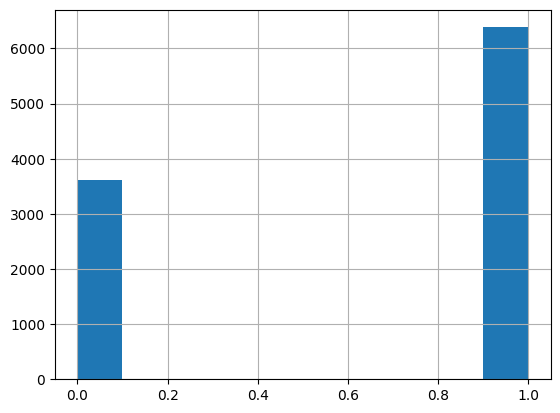

In [35]:
df['Zero Balance'].hist()

In [36]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

#Define Label and features

In [37]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [40]:
x= df.drop(['Surname','Churn'],axis=1)

In [41]:
y =df['Churn']

In [42]:
x.shape, y.shape

((10000, 11), (10000,))

# Handling Imbalance Data
#1.Undersampling
#2.Oversampling



In [43]:
#1-left
#0- not left
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

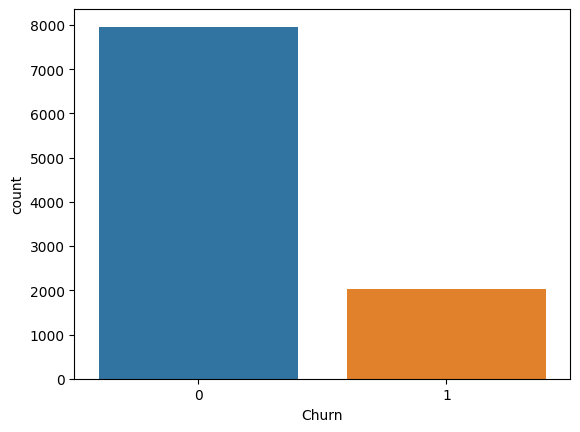

In [45]:
sns.countplot(x='Churn', data=df);

In [46]:
x.shape, y.shape

((10000, 11), (10000,))

#Random under sampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rus= RandomUnderSampler(random_state=2529)

In [49]:
x_rus, y_rus= rus.fit_resample(x,y)

In [50]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [54]:
#1-left
#0- not left
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [57]:
#after random under sampling
#1-left
#0- not left
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

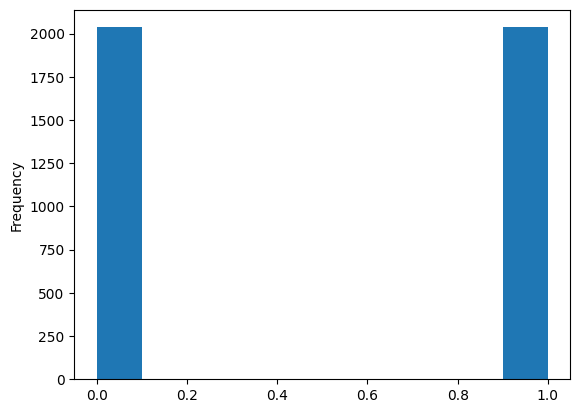

In [58]:
y_rus.plot(kind= 'hist')

#Random Over Sampling


In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
ros= RandomOverSampler(random_state=2529)

In [61]:
x_ros, y_ros= ros.fit_resample(x,y)

In [63]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [65]:
#1-left
#0- not left
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [66]:
#after random over sampling
#1-left
#0- not left
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

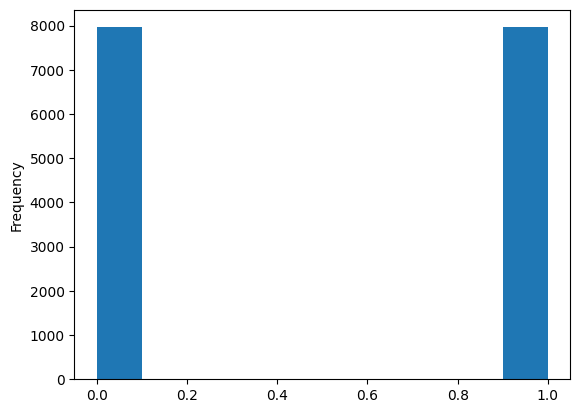

In [68]:
y_ros.plot(kind='hist')

#Train Test Split Method


In [69]:
from sklearn.model_selection import train_test_split

#Split origanal Data

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2529)

#Split Random Under sample Data

In [72]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus,y_rus, test_size=0.3, random_state=2529)

#Split Random over sample Data

In [73]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros,y_ros, test_size=0.3, random_state=2529)

#Standardize Features
#Data preprocessing

In [74]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()

#Satandardize original data

In [82]:
x_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [84]:
x_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Satandardize Random under sample data

In [85]:
x_train_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train_rus [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [86]:
 x_test_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Satandardize Random over sample data

In [87]:
x_train_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train_ros [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

In [88]:
 x_test_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros [['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

#Support vector Classifier

In [89]:
from sklearn.svm import SVC
svc =  SVC()

In [90]:
svc.fit(x_train, y_train)

SVC()

In [91]:
y_pred= svc.predict(x_test)

#Model Accuracy


In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



support vector machine accuracy is 0.84= 84%

 recall is = 0.26 = 26%



#Hyperparameter tunning
#cross-valiidation

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(x_train, y_train)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [122]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [123]:
grid_predictions = grid.predict (x_test)

In [124]:
confusion_matrix(y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [125]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



accuracy = 0.80= 80%
recall =0.41= 41%

#Model with random under sampling

In [126]:
svc_rus= SVC()

In [128]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [129]:
y_pred_rus =svc_rus.predict(x_test_rus)

#Model accuracy

In [130]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [131]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



accuracy = 0.73= 73%
recall =0.71= 71%

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(x_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [134]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [136]:
grid_predictions_rus = grid_rus.predict (x_test_rus)

In [137]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]])

In [138]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



#Model with random over sampling

In [143]:
svc_ros= SVC()

In [144]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [145]:
y_pred_ros =svc_ros.predict(x_test_ros)

#Model accuracy


In [146]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [147]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



accuracy = 0.75= 75%
recall =0.74= 74%

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(x_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [152]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [153]:
grid_predictions_ros = grid_ros.predict (x_test_ros)

In [159]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [160]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



accuracy = 0.92= 92%
recall =0.97= 97%

#Results:


#Normal Data

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



#After Hyperparameter tunning





In [162]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



#Random under sampling

In [163]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



#After Hyperparameter tunning On Random under sampler


In [164]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



#Random over sampling

In [166]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



#After Hyperparameter tunning On Random over sampler


In [165]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



#Churn Prediction:

In this classification problem, a lot of information about the consumers was provided, and the dataset was pretty clean with no missing values
and no duplicate values.
With only two classes in the objective feature (0: not churned, 1: churned), it was a binary classification challenge. The classes were imbalanced
and the models were predicting all 0s in the target feature. We had employed the over-sampling technique to address this.
we found repeated categorical values in some of the columns, We used LabelEncoder() to assign numerical values for categorical values.Later on,
the Age, Balance and Vintage columns were scaled using standardscalar by projecting mean to zero and varience to one.

Some key lessons that the Bank can focus to bring down the churn rate:-

*   1.Greater percentage of females are likely to churn.

*   2.Customers who has not done any transaction in the past 3 months are more
      likely to churn.

*  3.Customers with credit card are more in number and are more likely to churn.

*    Customers with poor credit ratings dominate the dataset and are also more
     likely to exit.

*  5.High-income customers are difficult to keep as they are more prone to
     churn.







